<a id='toc'></a>
<img src="img/logo.png" alt="drawing" width="200"/>
<!-- ![image info](img/logo.png "Data Science Take Home Challenge") -->
# Data Science Take Home Challenge

**Table of Contents**

&nbsp; [Setup](#setup)<br/>
&nbsp; [Get data](#data)<br/>
&nbsp;&nbsp; [Example #1](#ex1)<br/>
&nbsp;&nbsp; [Example #2](#ex2)<br/>
&nbsp;&nbsp; [Example #3](#ex3)<br/>
&nbsp; [Challenge #1](#ch1)<br/>
&nbsp; [Challenge #2](#ch2)<br/>
&nbsp; [Challenge #3](#ch3)<br/>
&nbsp; [Extra Challenge](#ch4)<br/>

[End Of File](#eof)<br/>

This exercise challenges you to be creative with data and tell a story using data. There are four problems. We only ask to complete the first two of them. You can decide to impress us by completing any remaining ones or even creating something of your own that this data inspires you to pursue.

You have 48 hours to return the first two problems. If you want to pursue other analyses, please tell us when you return the first two. You will set the rules for the extra problems: describe what you want to achieve and the timeline. We will hold to your word!

<a id='setup'></a>
## Setup 
[back to TOC](#toc)

Please use Conda to set up your environment. Start by the requirements used in this notebook, create the conda environment using the `around_env.yml` file. If you use additional libraries, please update the .yml file to allow us to run your exact environment. The document to manage conda environments is [here](https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html#sharing-an-environment).

In [1]:
import pandas as pd
import geopandas as gpd
import osmnx as ox
import folium
import matplotlib.pyplot as plt
import seaborn as sns

<a id='data'></a>
## Get data (with example code)
[back to TOC](#toc)

Please use data from Open Street Map (OSM). We're going to use the `osmnx` ([docs here](https://osmnx.readthedocs.io/en/stable/)) to upload the data straight into Python, and `folium` ([docs here](https://python-visualization.github.io/folium/modules.html#module-folium.map)) to plot maps.

Please **feel free, at any time, to include additional data sets** you find yourself, or even information you deem relevant from our [website](https://around.to) (e.g., where we are already listing space and their characteristics).

In [18]:
place = "Mexico City, Mexico"
graph = ox.graph_from_place(place, network_type="drive")

<a id='ex1'></a>
### Example #1: get streets
[back to TOC](#toc)
Here we show you an example of uploading streets, and showing a bar chart with the most frequent street types. 

In [118]:
nodes, streets = ox.graph_to_gdfs(graph)
streets.head()

osmid  oneway lanes                      name  \
u        v         key                                                      
30339493 274185917 0    226529202    True     4  Calzada San Antonio Abad   
30339495 274187776 0    226529202    True     4  Calzada San Antonio Abad   
         274188569 0    683249554    True     1      Calle Juan A. Mateos   
30339671 275512749 0    396108080   False     4       Calle Matías Romero   
         274840978 0    569407579   False     4       Calle Matías Romero   

                            highway   length  \
u        v         key                         
30339493 274185917 0          trunk  143.775   
30339495 274187776 0          trunk  119.144   
         274188569 0    residential   58.283   
30339671 275512749 0    residential   87.489   
         274840978 0    residential   12.831   

                                                                 geometry  \
u        v         key                                                      
30339493 274185917 0    LINESTRING (-99.13410 19.41806, -99.13409 19.4...   
30339495 274187776 0    LINESTRING (-99.13533 19.41027, -99.13517 19.4...   
         274188569 0    LINESTRING (-99.13533 19.41027, -99.13478 19.4...   
30339671 275512749 0    LINESTRING (-99.15338 19.37858, -99.15256 19.3...   
         274840978 0    LINESTRING (-99.15338 19.37858, -99.15350 19.3...   

                        ref maxspeed width bridge tunnel junction access  
u        v         key                                                    
30339493 274185917 0    NaN      NaN   NaN    NaN    NaN      NaN    NaN  
30339495 274187776 0    NaN      NaN   NaN    NaN    NaN      NaN    NaN  
         274188569 0    NaN      NaN   NaN    NaN    NaN      NaN    NaN  
30339671 275512749 0    NaN      NaN   NaN    NaN    NaN      NaN    NaN  
         274840978 0    NaN      NaN   NaN    NaN    NaN      NaN    NaN

In [4]:
nodes.head(10)

,y,x,street_count,highway,ref,geometry
osmid,,,,,,
30339493,19.418057,-99.134103,3,NaN,NaN,POINT (-99.13410 19.41806)
30339495,19.410274,-99.135329,3,NaN,NaN,POINT (-99.13533 19.41027)
30339671,19.378576,-99.153380,4,NaN,NaN,POINT (-99.15338 19.37858)
30339672,19.380206,-99.153073,4,traffic_signals,NaN,POINT (-99.15307 19.38021)
30339673,19.381830,-99.152779,4,NaN,NaN,POINT (-99.15278 19.38183)
30339674,19.384548,-99.152267,4,NaN,NaN,POINT (-99.15227 19.38455)
30339675,19.386446,-99.151936,4,NaN,NaN,POINT (-99.15194 19.38645)
30339676,19.388593,-99.151550,4,NaN,NaN,POINT (-99.15155 19.38859)
30339677,19.390038,-99.151376,4,NaN,NaN,POINT (-99.15138 19.39004)


In [31]:
street_types = pd.DataFrame(streets["highway"].apply(pd.Series)[0].value_counts().reset_index())
street_types.columns = ["type", "count"]

In [32]:
street_types.head()

,type,count
0,residential,37850
1,unclassified,7131
2,tertiary,6853
3,secondary,3876
4,primary,1748


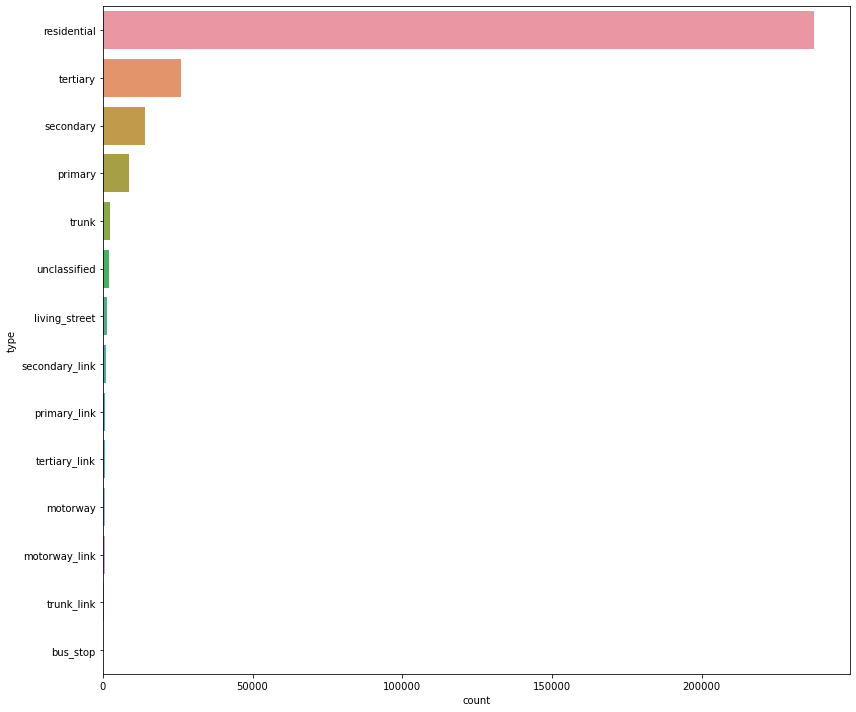

In [10]:
fig, ax = plt.subplots(figsize=(12,10))

sns.barplot(y="type", x="count", data=street_types, ax=ax)

plt.tight_layout()

<a id='ex2'></a>
### Example #2: plot cafes on a map
[back to TOC](#toc)

In [11]:
cafe = ox.geometries_from_place(place, tags={'amenity': "cafe"})
cafe.head()

amenity      brand brand:wikidata brand:wikipedia  \
element_type osmid                                                         
node         319644388    cafe  Starbucks         Q37158    en:Starbucks   
             331704809    cafe  Starbucks         Q37158    en:Starbucks   
             333981273    cafe        NaN            NaN             NaN   
             381148591    cafe        NaN            NaN             NaN   
             434309918    cafe        NaN            NaN             NaN   

                            cuisine           name     official_name takeaway  \
element_type osmid                                                              
node         319644388  coffee_shop      Starbucks  Starbucks Coffee      yes   
             331704809  coffee_shop      Starbucks  Starbucks Coffee      yes   
             333981273          NaN      Starbucks               NaN      NaN   
             381148591          NaN     El Jarocho               NaN     only   
             434309918          NaN  Cielito Lindo               NaN      NaN   

                                          geometry       addr:street  ...  \
element_type osmid                                                    ...   
node         319644388  POINT (-99.19696 19.34950)               NaN  ...   
             331704809  POINT (-99.22324 19.42655)               NaN  ...   
             333981273  POINT (-99.26286 19.36819)               NaN  ...   
             381148591  POINT (-99.16183 19.35121)  Calle Cuauhtémoc  ...   
             434309918  POINT (-99.18334 19.37345)               NaN  ...   

                       building:levels faculty capacity leisure addr:province  \
element_type osmid                                                              
node         319644388             NaN     NaN      NaN     NaN           NaN   
             331704809             NaN     NaN      NaN     NaN           NaN   
             333981273             NaN     NaN      NaN     NaN           NaN   
             381148591             NaN     NaN      NaN     NaN           NaN   
             434309918             NaN     NaN      NaN     NaN           NaN   

                       addr:state air_conditioning wikidata wikipedia cafe  
element_type osmid                                                          
node         319644388        NaN              NaN      NaN       NaN  NaN  
             331704809        NaN              NaN      NaN       NaN  NaN  
             333981273        NaN              NaN      NaN       NaN  NaN  
             381148591        NaN              NaN      NaN       NaN  NaN  
             434309918        NaN              NaN      NaN       NaN  NaN  

[5 rows x 87 columns]

In [87]:
cafe_points = cafe.geometry["node"]

m = folium.Map([19.4326, -99.1332], 
               zoom_start=13, 
               tiles="CartoDB positron")

locs = zip(cafe_points.geometry.y, cafe_points.geometry.x)

#folium.GeoJson(buildings, style_function=lambda x: style_buildings).add_to(m)

for location in locs:
    folium.CircleMarker(location=location,
                        color = "#000", radius=2).add_to(m)

m

<a id='ex3'></a>
### Example #3: get buildings
[back to TOC](#toc)

In [13]:
buildings = ox.geometries_from_place(place, tags={'building':True})

/Applications/anaconda3/envs/gis/lib/python3.8/site-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
/Applications/anaconda3/envs/gis/lib/python3.8/site-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):


In [14]:
buildings.head()

amenity parking                    geometry  \
element_type osmid                                                              
node         317901981   place_of_worship     NaN  POINT (-99.17348 19.37032)   
             1137180894               NaN     NaN  POINT (-99.16301 19.37596)   
             1390978468               NaN     NaN  POINT (-99.22166 19.31645)   
             1419644916               NaN     NaN  POINT (-99.16316 19.37535)   
             1677836390               NaN     NaN  POINT (-99.12656 19.47105)   

                                                      name barrier  \
element_type osmid                                                   
node         317901981   Paroquia de la Divina Providencia     NaN   
             1137180894                                NaN     NaN   
             1390978468  Módulo de expedición de licencias     NaN   
             1419644916                                NaN     NaN   
             1677836390                           Oficinas     NaN   

                             created_by    building denomination   religion  \
element_type osmid                                                            
node         317901981   Potlatch 0.10f      church     catholic  christian   
             1137180894             NaN    entrance          NaN        NaN   
             1390978468             NaN  government          NaN        NaN   
             1419644916             NaN    entrance          NaN        NaN   
             1677836390             NaN         yes          NaN        NaN   

                        addr:housenumber  ... contact:facebook name:hy  \
element_type osmid                        ...                            
node         317901981               NaN  ...              NaN     NaN   
             1137180894              NaN  ...              NaN     NaN   
             1390978468              NaN  ...              NaN     NaN   
             1419644916              NaN  ...              NaN     NaN   
             1677836390              NaN  ...              NaN     NaN   

                        name:ms ways type subject  url name:hi wikipedia:en  \
element_type osmid                                                            
node         317901981      NaN  NaN  NaN     NaN  NaN     NaN          NaN   
             1137180894     NaN  NaN  NaN     NaN  NaN     NaN          NaN   
             1390978468     NaN  NaN  NaN     NaN  NaN     NaN          NaN   
             1419644916     NaN  NaN  NaN     NaN  NaN     NaN          NaN   
             1677836390     NaN  NaN  NaN     NaN  NaN     NaN          NaN   

                        building:material_1  
element_type osmid                           
node         317901981                  NaN  
             1137180894                 NaN  
             1390978468                 NaN  
             1419644916                 NaN  
             1677836390                 NaN  

[5 rows x 360 columns]

In [15]:
buildings.shape

(116070, 360)

<a id='ch1'></a>
## Challenge #1: Visualize
[back to TOC](#toc)

**Question: What are the potential areas for listing office space relevant to around's customers?**

Please show us what OSM data can tell us about potential areas where we should (or already) list office space using a compelling visualization (one ore more charts / maps / infographics).

#### <font color='#000080'> Amenities in the city </font>

To be able to figure out the potential areas for office space, we need to know the existing amenities around the city. Given that for an increased productivity for a team it is best to choose locations in an already productive environment such as near a library, cafe, university or internet cafe

In [40]:
buildings.amenity.unique()

array(['place_of_worship', nan, 'theatre', 'studio', 'school',
       'restaurant', 'cafe', 'marketplace', 'parking', 'toilets',
       'fast_food', 'bank', 'public_building', 'conference_centre',
       'fuel', 'bus_station', 'hospital', 'courthouse', 'arts_centre',
       'cinema', 'kindergarten', 'Radio station', 'love_hotel', 'bar',
       'publisher', 'university', 'community_centre', 'library',
       'post_office', 'veterinary', 'bicycle_rental', 'ice_cream',
       'college', 'social_facility', 'doctors', 'clinic', 'police',
       'townhall', 'waste_disposal', 'pharmacy', 'casino', 'public_bath',
       'nightclub', 'music_school', 'labor_union', 'language_school',
       'taxi', 'childcare', 'fire_station', 'recycling', 'shelter',
       'car_wash', 'events_venue', 'crematorium', 'animal_boarding',
       'internet_cafe', 'dentist', 'animal_shelter', 'flight_school',
       'food_court', 'driving_school', 'dojo', 'parking_space',
       'social_centre', 'research_institute'],

#### <font color='#000080'> Productivity and Transportation Links </font>

Chosen amenities which induce productive environment: Library, cafe, university, internet_cafe, social centre, research institute and conference centre. 

Asides producitivity we also need to consider location accessbility in terms of nearest transportation services, so that customers of around can get to the office space without any transportation issues. 

In [46]:
cafe = ox.geometries_from_place(place, tags={'amenity': "cafe"})

In [51]:
university = ox.geometries_from_place(place, tags={'amenity': "university"})

/Applications/anaconda3/envs/gis/lib/python3.8/site-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
/Applications/anaconda3/envs/gis/lib/python3.8/site-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):


In [53]:
library = ox.geometries_from_place(place, tags={'amenity': "library"})
social_centre = ox.geometries_from_place(place, tags={'amenity': "social_centre"})
research = ox.geometries_from_place(place, tags={'amenity': "research_institute"})
cc = ox.geometries_from_place(place, tags={'amenity': "conference_centre"})

In [78]:
bus = ox.geometries_from_place(place, tags={'amenity': "bus_station"})

/Applications/anaconda3/envs/gis/lib/python3.8/site-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
/Applications/anaconda3/envs/gis/lib/python3.8/site-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):


In [60]:
region = ox.geocode_to_gdf(place)

<AxesSubplot:>

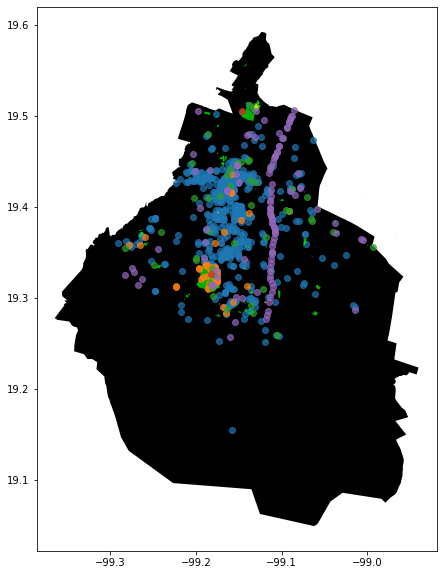

In [81]:
fig, ax = plt.subplots(figsize=(12,10))
region.plot(ax=ax, facecolor='black')

#Cafe colored in blue
cafe.plot(ax=ax, facecolor='#0000FF', alpha=0.7)

#University in Green
university.plot(ax=ax, facecolor='#00FF00', alpha=0.7)

#Library in Orange
library.plot(ax=ax, facecolor='#FFA500', alpha=0.7)


#Research Centre and Conference Centre in yellow
research.plot(ax=ax, facecolor='#FFFF00', alpha=0.7)
cc.plot(ax=ax, facecolor='#FFFF00', alpha=0.7)


#Bus stations in purple
bus.plot(ax=ax, facecolor='#800080', alpha=0.7)

#### <font color='#000080'> Interpretation </font>

Based on the above graph we can now easily circle locations where we would want to list office spaces. For instance the centre of the map with concentrated with orange pins is a suitable location because it has majority of the necessary amenities nearby, such cafes, bus stops and libraries. 

<a id='ch2'></a>
## Challenge #2: The basics of ML
[back to TOC](#toc)

**Question: Develop code for a logistic regression**

Please develop a function or an object that implements the logistic regression algorithm using the gradient descent optimization. The only external libraries you are allowed to use are `numpy`, `math`, and `pandas`.

Fit your logistic regression model on a dataset of your choice, or even better, to one of the data you've got above from OSM, and output the accuracy on the test set. For splitting data into train and test, please feel free to use Scikit-learn's `from sklearn.model_selection import train_test_split`.

#### <font color='#000080'> Breast Cancer Winconsin Dataset </font>
I am using the breast cancer wisconsin dataset because i have worked with this dataset in the past

In [88]:
import numpy as np

In [90]:
from sklearn.datasets import load_breast_cancer

cancer_data = load_breast_cancer()
cancer_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [91]:
cancer_data.target_names

array(['malignant', 'benign'], dtype='<U9')

I will only be working with the features that have the 'mean' label

In [94]:
dataframe = pd.DataFrame(cancer_data["data"], columns=cancer_data.feature_names)

dataframe = dataframe[dataframe.columns[dataframe.columns.str.startswith('mean')]]

dataframe['target'] = cancer_data.target
dataframe.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0


In [95]:
dataframe.shape

(569, 11)

In [98]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(dataframe.iloc[:,:-1], dataframe.target, test_size=0.2, random_state = 12345)


print('Training set has', x_train.shape[0], 'rows')
print('Test set has', x_test.shape[0], 'rows')

Training set has 455 rows
Test set has 114 rows


Transforming the data

In [100]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [101]:
#Transformed test data frame
pd.DataFrame(x_train, columns=dataframe.columns[:-1])

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension
0,3.707522,0.636479,3.689347,4.490213,0.916322,1.606814,2.440709,3.519566,-0.046691,-0.745130
1,-0.846158,0.527808,-0.869192,-0.778375,0.378619,-0.850715,-1.001404,-0.982007,-0.703805,-0.206592
2,-0.786614,-0.067518,-0.819157,-0.734134,-0.659290,-1.031827,-0.815342,-0.703074,0.709879,-0.478741
3,-0.403833,-0.355732,-0.457836,-0.437412,-1.237321,-1.122570,-0.938723,-0.789017,-1.257912,-1.070557
4,-0.157151,-0.315571,-0.242111,-0.237342,-1.200530,-1.210326,-0.865090,-0.940815,-0.852988,-1.105115
...,...,...,...,...,...,...,...,...,...,...
450,-0.729906,-0.032082,-0.735901,-0.695529,-0.777443,-0.525086,-0.433442,-0.892504,0.773814,-0.029479
451,1.600807,1.404261,1.569001,1.508897,0.357394,0.999994,2.037276,1.665947,1.381201,-0.251230
452,-0.443528,-0.183276,-0.505001,-0.472071,-0.885691,-1.179705,-1.089206,-1.181252,-0.412544,-0.622735
453,-0.480389,-0.653395,-0.381143,-0.506731,-0.092579,0.854357,0.798514,-0.023414,0.954965,1.493979


In [102]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [104]:
lr = LogisticRegression(penalty = "none") 
lr.fit(X = x_train, y = y_train)

LogisticRegression(penalty='none')

In [106]:
pd.Series(lr.coef_[0], index=dataframe.columns[:-1]).sort_values()

mean area                -14.915462
mean concave points       -3.969692
mean texture              -1.604304
mean smoothness           -1.013453
mean symmetry             -0.478543
mean concavity            -0.262855
mean compactness           0.214908
mean fractal dimension     0.524564
mean perimeter             3.012014
mean radius                7.194871
dtype: float64

Based on the absolute value of the coefficients of the chosen target we can tell that the area and radius have great importance in predicting cancer

#### <font color='#000080'> Prediction on the Test Data</font>

In [111]:
y_pred = lr.predict(x_test)
y_pred[:20]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0])

In [117]:
y_pred.shape

(114,)

The above dataset (y_pred) are the predictions of the target values of the training set

<a id='ch3'></a>
## Challenge #3: Unsupervised learning
[back to TOC](#toc)

**Question: Find similarities in geographical data**

Pick a clustering algorithm you're familiar with (hierchical or k-means, k-NN, PCA, ...), and run it on geographical features of Mexico City (you can decide what data: buildings, points of interest, streets, amenties, combination of these, etc.). Try to give a sound interpretation of the clusters: What kind of groups did the algorithm create? Perhaps they're richer and poorer neighbours, or activities/places for tourists. We want to see your ability to make sense of unsupervised learning results, and communicate them to non-technical audiences.

<a id='ch4'></a>
## Extra Challenge: Surprise us!
[back to TOC](#toc)

**Question: What else can you get out from OSM data or other data sets?**

Think, for example, getting census data and contextualize it in these maps. Or get information from a small businesses database, and link it to the area we're studying in this challenge.
Otherwise, what else can you show or model that brings about relevant and useful insight?

In [ ]:
# Your code should start here




<a id='eof'></a>
End of File
[back to TOC](#toc)
***